# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

# Load The Data

In [2]:
data = pd.read_excel("Downloads/Review_ratings.xlsx")
data

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
0,User 1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.00,0.00,0.00
1,User 2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.00,0.00,0.00
2,User 3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.00,0.00,0.00
3,User 4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.00,0.00,0.00
4,User 5,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,User 996,0.53,0.57,5.00,1.27,1.25,1.28,4.78,1.32,5.00,...,5.00,0.89,0.86,0.87,0.89,0.54,3.33,0.50,0.00,0.55
996,User 997,0.64,0.58,5.00,1.27,1.25,1.27,1.29,1.32,5.00,...,5.00,0.91,0.86,0.87,0.89,0.92,1.46,0.50,0.00,0.51
997,User 998,0.64,0.57,5.00,1.27,1.25,1.27,1.29,1.32,5.00,...,5.00,0.91,0.86,0.87,0.89,0.92,3.33,0.51,0.50,0.52
998,User 999,0.64,0.58,5.00,1.27,1.26,1.28,4.78,1.32,5.00,...,5.00,0.88,0.85,0.87,0.89,0.55,3.34,0.51,0.50,0.52


# Check Null and Duplicate Values

In [3]:
data.isnull().sum()

User           0
Category 1     0
Category 2     0
Category 3     0
Category 4     0
Category 5     0
Category 6     0
Category 7     0
Category 8     0
Category 9     0
Category 10    0
Category 11    0
Category 12    0
Category 13    0
Category 14    0
Category 15    0
Category 16    0
Category 17    0
Category 18    0
Category 19    0
Category 20    0
Category 21    0
Category 22    0
Category 23    0
Category 24    0
dtype: int64

In [4]:
data.duplicated().sum()

0

# Statistical Analysis

In [5]:
data.describe().round()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,...,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
count,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,...,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
mean,1.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0
min,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,1.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,2.0,3.0,4.0,4.0,4.0,4.0,5.0,3.0,5.0,5.0,...,5.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,2.0
max,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


In [6]:
data_corr = data.corr()
data_corr

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,...,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
Category 1,1.000000,0.334387,0.152085,-0.057996,-0.021630,-0.054989,-0.127978,-0.091908,-0.167320,-0.099067,...,-0.073992,0.125218,0.063201,0.056625,-0.048143,0.087239,0.216977,0.347729,0.436699,0.492134
Category 2,0.334387,1.000000,0.322398,0.140001,0.100675,-0.071542,-0.125607,0.011390,-0.000180,-0.018841,...,-0.037277,0.009860,-0.072464,-0.056523,0.027780,0.074913,0.121246,0.043089,0.103352,0.216292
Category 3,0.152085,0.322398,1.000000,0.348894,0.281375,0.079136,-0.142596,-0.132752,-0.205165,-0.110814,...,-0.154213,-0.027418,-0.063602,-0.115061,-0.075253,-0.059041,0.052919,0.065072,0.099980,0.090561
Category 4,-0.057996,0.140001,0.348894,1.000000,0.603419,0.286572,-0.246032,-0.120738,-0.197667,-0.092946,...,-0.256149,0.031907,-0.140659,-0.232656,-0.161849,-0.033747,0.007725,0.175321,-0.062198,-0.043581
Category 5,-0.021630,0.100675,0.281375,0.603419,1.000000,0.461316,0.016076,0.065528,-0.109450,0.002687,...,-0.319093,-0.052769,-0.193173,-0.292277,-0.270259,-0.107498,-0.041384,0.149028,-0.002566,-0.029861
Category 6,-0.054989,-0.071542,0.079136,0.286572,0.461316,1.000000,0.261644,0.245098,0.147161,0.004346,...,-0.174618,-0.203105,-0.222526,-0.264463,-0.270167,-0.197949,-0.096873,0.058030,0.018921,-0.089710
Category 7,-0.127978,-0.125607,-0.142596,-0.246032,0.016076,0.261644,1.000000,0.397926,0.310894,0.162234,...,0.133175,-0.135920,-0.080494,-0.097122,-0.108986,-0.120307,-0.118353,-0.232638,-0.067821,-0.134519
Category 8,-0.091908,0.011390,-0.132752,-0.120738,0.065528,0.245098,0.397926,1.000000,0.424644,0.382085,...,-0.008117,-0.126495,-0.235207,-0.262117,-0.281807,-0.246358,-0.229086,-0.194334,-0.127591,-0.063974
Category 9,-0.167320,-0.000180,-0.205165,-0.197667,-0.109450,0.147161,0.310894,0.424644,1.000000,0.545909,...,0.257536,-0.060555,-0.204207,-0.227009,-0.184622,-0.029368,-0.051789,-0.173349,-0.203781,-0.286864
Category 10,-0.099067,-0.018841,-0.110814,-0.092946,0.002687,0.004346,0.162234,0.382085,0.545909,1.000000,...,0.186099,0.041630,-0.225012,-0.252253,-0.284033,-0.074126,-0.099099,-0.054607,-0.153003,-0.219912


# Detect and Clean The Outliers

<AxesSubplot:>

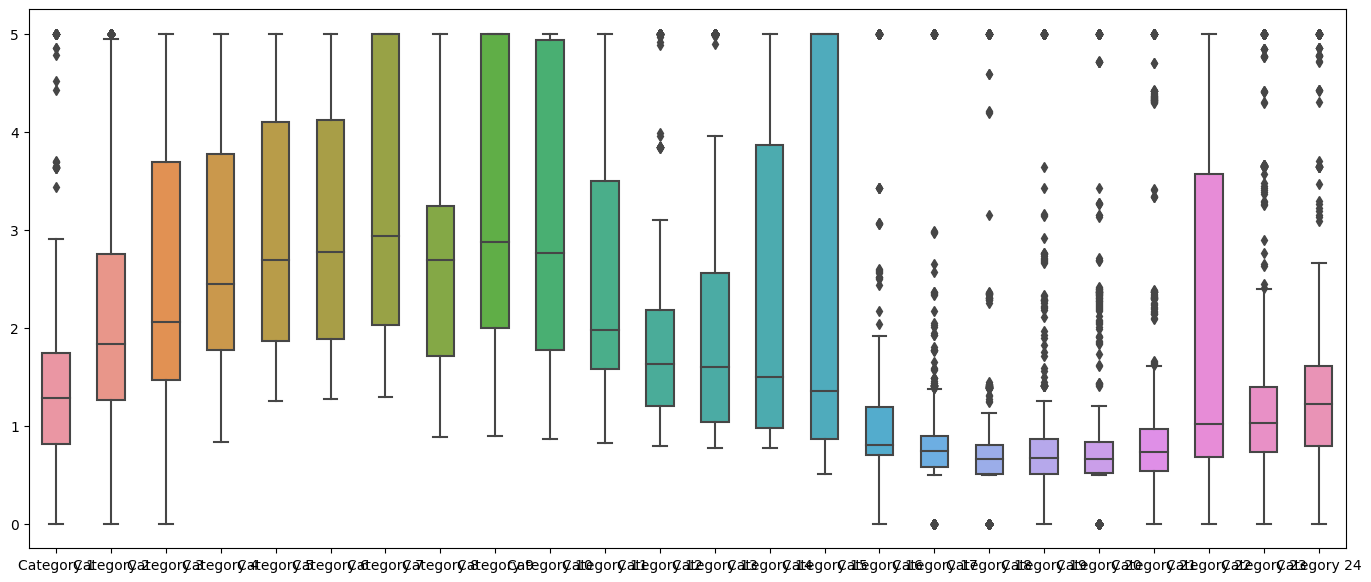

In [7]:
plt.figure(figsize=(17, 7))
sns.boxplot(data = data, width = 0.5)

In [8]:
for i in range(1, 25):
    # Calculate the Interquartile range (IQR) for each column
    Q1 = data.iloc[:, i].quantile(0.25)
    Q3 = data.iloc[:, i].quantile(0.75)
    IQR = Q3 - Q1
    
    # Determine the upper and lower bounds for identifying outliers
    upper_bound = Q3 + 1.5*IQR
    lower_bound = Q1 - 1.5*IQR
    
    # Identify any data points outside the upper and lower bounds as outliers
    outliers = data[(data.iloc[:, i] > upper_bound) | (data.iloc[:, i] < lower_bound)]
    
    # Handle The Outliers
    #mean = data.iloc[:, i].mean()
    #data.loc[outliers.index, data.columns[i]] = mean
    data.iloc[:, i] = data.iloc[:, i].clip(lower=lower_bound, upper=upper_bound)
    
    # Print the number of outliers and any other relevant information
    print(f"Category {i} has {len(outliers)} outliers.")

Category 1 has 47 outliers.
Category 2 has 160 outliers.
Category 3 has 0 outliers.
Category 4 has 0 outliers.
Category 5 has 0 outliers.
Category 6 has 0 outliers.
Category 7 has 0 outliers.
Category 8 has 0 outliers.
Category 9 has 0 outliers.
Category 10 has 0 outliers.
Category 11 has 0 outliers.
Category 12 has 124 outliers.
Category 13 has 196 outliers.
Category 14 has 0 outliers.
Category 15 has 0 outliers.
Category 16 has 107 outliers.
Category 17 has 217 outliers.
Category 18 has 325 outliers.
Category 19 has 137 outliers.
Category 20 has 337 outliers.
Category 21 has 89 outliers.
Category 22 has 0 outliers.
Category 23 has 147 outliers.
Category 24 has 103 outliers.


# Preprocess The Data

In [9]:
#data.drop(columns = "User")

In [10]:
for i in range(1,25):
    data.iloc[:, i] = data.iloc[:, i].apply(pd.to_numeric, errors='coerce')

### Handle the missing values in the data

In [11]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

data2 = imputer.fit_transform(data.iloc[:, 1:])
data2

array([[0.  , 0.  , 3.63, ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 3.63, ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 3.63, ..., 0.  , 0.  , 0.  ],
       ...,
       [0.64, 0.57, 5.  , ..., 0.51, 0.5 , 0.52],
       [0.64, 0.58, 5.  , ..., 0.51, 0.5 , 0.52],
       [0.65, 0.58, 5.  , ..., 0.51, 0.51, 0.53]])

### Scale the data

In [12]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data2)

## Applay PCA (Principal Component Analysis) to the data

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(data_scaled)
len(X_pca)

1000

In [14]:
X_pca

array([[-3.38754218, -1.69972866],
       [-3.44181964, -1.73062527],
       [-3.44113906, -1.72472157],
       ...,
       [-0.72183533,  2.52597731],
       [-1.05313661,  1.88022362],
       [-0.48103313,  2.18135854]])

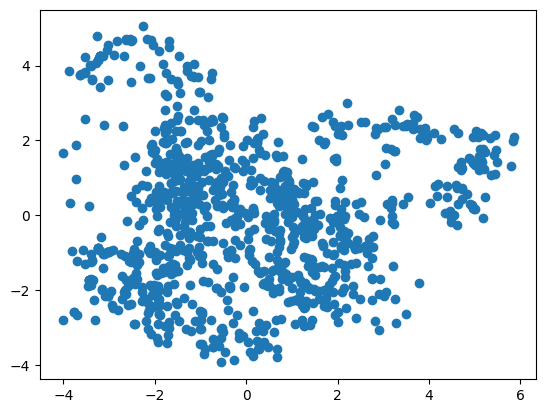

In [15]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.show()

# The K-Mean Model

In [36]:
k = int(input("Enter The number of Clusters: "))

centroids = X_pca[np.random.choice(len(X_pca), k, replace=False)]

print(centroids)

Enter The number of Clusters: 20
[[-1.68665764 -2.85216296]
 [-3.25149624 -0.88434458]
 [ 2.90709032 -3.05960043]
 [ 5.18670814  2.13384671]
 [ 0.47059601 -1.89140262]
 [-3.44113906 -1.72472157]
 [-3.71529561  0.97312573]
 [ 3.24185125  1.72763831]
 [ 1.92898569 -1.02994779]
 [ 3.05961771  2.34763308]
 [ 1.15765918  0.58567099]
 [-1.33024632  1.9279629 ]
 [-0.03017178  0.06068107]
 [-1.6059585   0.58615387]
 [-0.79319881 -0.28480428]
 [-2.80982626 -2.54717721]
 [ 2.07901566 -0.88918166]
 [-0.51070734  0.18183294]
 [ 2.92984277 -1.71056259]
 [-2.05505333  1.90111905]]


In [37]:
from scipy.spatial.distance import cdist

distances = cdist(X_pca, centroids ,'euclidean')

print(len(distances))
print(distances)

1000
[[2.05453475 0.82665573 6.43984856 ... 3.43750677 6.31739425 3.83948314]
 [2.08289232 0.86741801 6.48651159 ... 3.4998451  6.371694   3.88750404]
 [2.08550453 0.86150907 6.48705772 ... 3.49605208 6.37099757 3.88174624]
 ...
 [5.46399807 4.24611348 6.66091435 ... 2.35363291 5.59312286 1.47238516]
 [4.77460278 3.53208472 6.33129204 ... 1.78290786 5.36263651 1.00213459]
 [5.17589308 4.13206987 6.24075567 ... 1.99974578 5.17504826 1.59877257]]


In [38]:
min_dist = np.array([np.argmin(i) for i in distances])
min_dist

array([ 5,  5,  5,  5,  5,  5, 15, 15, 15, 15,  5,  5, 15,  5,  5,  5,  5,
        5, 15, 15, 15, 15, 15,  5,  1,  1,  1,  5,  1,  1,  1,  1,  1,  1,
        5,  1, 15, 15, 15,  0, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 14,
       14, 14, 14, 14, 14,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        8,  8,  4, 12,  4,  4,  4,  4,  4,  8,  4,  4,  4,  4,  8,  4, 10,
        8,  8,  8,  8,  8, 10, 10, 10, 12, 12, 11, 11, 17, 12, 17, 12, 17,
       10, 11, 11, 11, 11, 11, 11, 13, 17, 13, 11, 12, 11, 11, 11, 19, 19,
       19, 19, 19, 11, 19, 19, 19, 11, 11, 11, 11, 11, 19, 19, 19, 19, 13,
       13, 13, 13, 14, 13, 11, 13, 13, 13, 13, 13, 13, 14, 13, 13, 13, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14,  4,  4,  4,  0, 14,  0, 14,  1,
       14, 14,  1,  0,  0,  0,  0,  0,  0, 15,  0,  0, 15, 15,  0, 15,  1,
        0,  1, 14,  0, 15,  1, 15,  1,  1,  1,  1, 15, 15,  5,  1,  1, 14,
       14,  0,  0,  1, 14

In [39]:
max_iters = 100

for i in range(max_iters):
    new_centroids = []
    
    for indx in range(k): #indx = 0    indx = 1    indx = 2
        temp = X_pca[min_dist == indx].mean(axis=0)
        new_centroids.append(temp)
        
    distances = cdist(X_pca, new_centroids ,'euclidean') 
    min_dist = np.array([np.argmin(i) for i in distances])

In [40]:
new_centroids = np.array(new_centroids)
new_centroids

array([[-1.04025036, -2.96019783],
       [-2.93933378, -0.9915617 ],
       [ 1.45182299, -2.08226989],
       [ 5.09224664,  1.70464118],
       [ 0.18002406, -3.29504285],
       [-3.28067348, -2.15953808],
       [-3.31697103,  1.53552836],
       [ 4.48769438,  0.32884429],
       [ 0.53120107, -1.37892689],
       [ 2.81291696,  2.20448644],
       [ 0.94739817,  0.47715526],
       [-1.3624667 ,  2.6602314 ],
       [-0.22161989, -0.06836488],
       [-1.55398418,  0.82927588],
       [-1.45808208, -0.9531602 ],
       [-2.0873479 , -2.18023029],
       [ 2.00686702, -0.37630128],
       [-0.1932484 ,  1.47651852],
       [ 2.69747201, -1.98286944],
       [-2.83715744,  4.19344104]])

In [41]:
min_dist

array([ 5,  5,  5,  5,  5,  5, 15,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5, 15, 15,  5,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  5,  5, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,  0,  0,
        0, 15, 15,  0,  0, 15,  0,  0,  0,  0, 15,  0,  0, 15,  0, 15, 14,
       14,  8, 12, 14, 12,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8, 12,  8,  2,  8,  8,  2,  2,  8,  8,  8,  2,  2,  2, 16,
       16, 16, 16,  8, 16, 16, 10, 10, 12, 17, 17, 17, 12, 12, 13, 10, 17,
       10, 17, 11, 17, 13, 11, 11, 13, 17, 13, 13, 12, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 17, 11, 11, 11, 13, 11, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 13, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 12, 12,  8,  0,  0, 14, 14, 14, 14, 14,
       14, 14, 14, 15, 15, 15, 15, 15, 15, 15,  0, 15, 15, 15, 15, 15,  1,
       15, 14, 14, 14, 15,  1, 15,  1,  1,  1, 14, 15, 15, 15,  1, 14, 14,
       14, 15, 14,  1, 14

In [42]:
data["Labels"] = min_dist
data

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Labels
0,User 1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,...,0.59,0.50,0.075,0.50,0.05125,0.000,0.00,0.00,0.00,5
1,User 2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,...,0.59,0.50,0.075,0.50,0.05125,0.000,0.00,0.00,0.00,5
2,User 3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,0.59,0.50,0.075,0.50,0.05125,0.000,0.00,0.00,0.00,5
3,User 4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,...,0.59,0.50,0.075,0.50,0.05125,0.000,0.00,0.00,0.00,5
4,User 5,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,0.59,0.50,0.075,0.50,0.05125,0.000,0.00,0.00,0.00,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,User 996,0.53,0.57,5.00,1.27,1.25,1.28,4.78,1.32,5.00,...,0.89,0.86,0.870,0.89,0.54000,1.615,0.50,0.00,0.55,11
996,User 997,0.64,0.58,5.00,1.27,1.25,1.27,1.29,1.32,5.00,...,0.91,0.86,0.870,0.89,0.92000,1.460,0.50,0.00,0.51,11
997,User 998,0.64,0.57,5.00,1.27,1.25,1.27,1.29,1.32,5.00,...,0.91,0.86,0.870,0.89,0.92000,1.615,0.51,0.50,0.52,11
998,User 999,0.64,0.58,5.00,1.27,1.26,1.28,4.78,1.32,5.00,...,0.88,0.85,0.870,0.89,0.55000,1.615,0.51,0.50,0.52,11


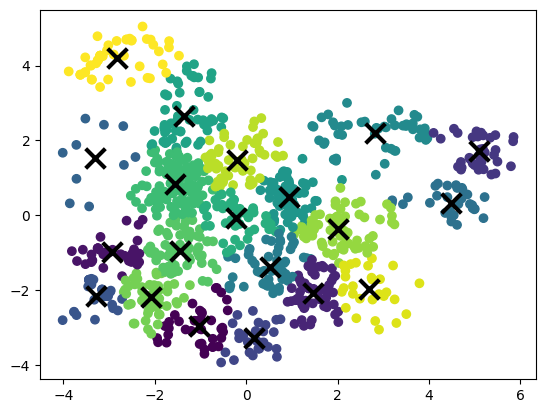

In [43]:
# plot the data points with different colors for each cluster
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=min_dist)
# plot the centroids with black crosses
plt.scatter(new_centroids[:, 0], new_centroids[:, 1], marker='x', s=200, linewidths=3, color='k')
plt.show()